In [2]:
import gdown
import pandas as pd

# 아래 두개의 값 입력 (로컬 컴퓨터 환경에서 실행은 url 비워둘 것)
filename = 'pt_book_fix.csv'  # 예제에서 사용할 filename 입력
url = ''    # 여기에 본인이 가진 링크의 난수 입력

if url != '' :
    gdown.download(f'https://drive.google.com/uc?id={url}', filename, quiet=False)
    dir = ''
else :
    dir = '../_csv/'  # 로컬 컴퓨터 환경에서 사용할 dir (예제는 _csv)

pt_book = pd.read_csv(f'{dir}{filename}', low_memory=False)
pt_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,세이노의 가르침,세이노 지음,데이원,2023,9.79117E+12,NaN,0,NaN,199.1,1,0,2023-03-30
1,2,서울대생의 비밀과외,"소린TV,안소린 [공]지음",다산에듀,2023,9.79113E+12,NaN,1,NaN,373.7,1,0,2023-03-30
2,3,(현직 고등학교 선생님들이 직접 고른) 생기부 필독서 100,주경아 외 지음,센시오,2023,9.79117E+12,NaN,1,NaN,376.6,1,0,2023-03-30
3,4,당연하게도 나는 너를,이꽃님 지음,우리학교,2023,9.79117E+12,NaN,4,NaN,813.7,1,0,2023-03-30
4,5,고요한 우연,김수빈 지음,문학동네,2023,9.78895E+12,NaN,0,NaN,813.7,1,0,2023-03-30


In [5]:
count_by_year = pt_book['발행년도'].value_counts()
count_by_year

발행년도
2003    12999
2004    12111
2002    11425
2008    10460
2007    10392
        ...  
2207        1
1959        1
1965        1
1963        1
3012        1
Name: count, Length: 68, dtype: int64

In [10]:
count_by_year = count_by_year.sort_index()
count_by_year

발행년도
0         2
1958      2
1959      1
1960      3
1963      1
       ... 
2023    476
2104      2
2202      1
2207      1
3012      1
Name: count, Length: 68, dtype: int64

In [30]:
count_by_year = count_by_year[count_by_year.index <= 2023]
count_by_year

발행년도
1958       2
1959       1
1960       3
1963       1
1965       1
        ... 
2019    5796
2020    5581
2021    5967
2022    4943
2023     476
Name: count, Length: 63, dtype: int64

In [31]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]
    
count_by_subject = pt_book['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

주제분류번호
8     83918
3     37515
5     16407
9     15744
4     13668
1     12236
6     10324
7      8881
2      7514
-1      931
0         4
Name: count, dtype: int64

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

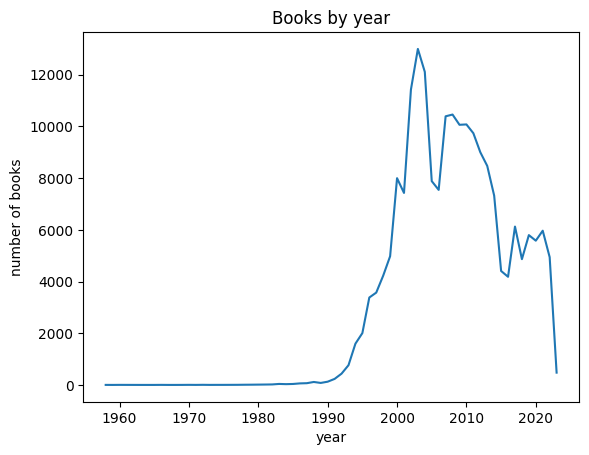

In [34]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

### 선 모양과 색상

실선 : '-'
점선 : ':'
쇄선 : '-.'
파선 : '--'

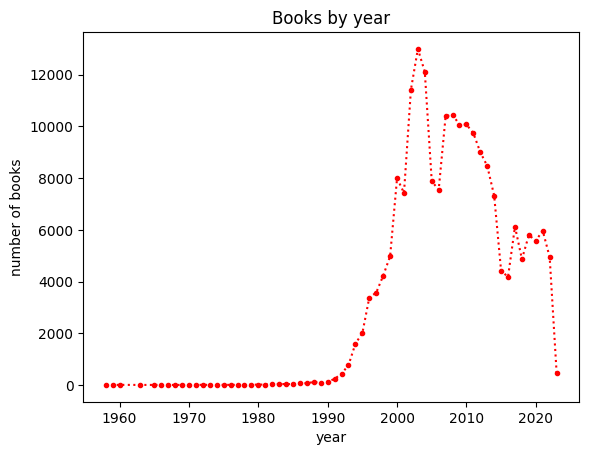

In [36]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

```
plt.plot(count_by_year, '.:r') # 하나의 문자열로 마커, 선 모양, 색상 지정
```

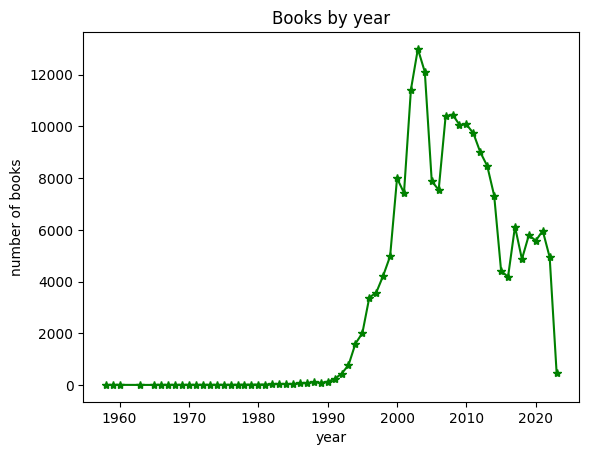

In [37]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

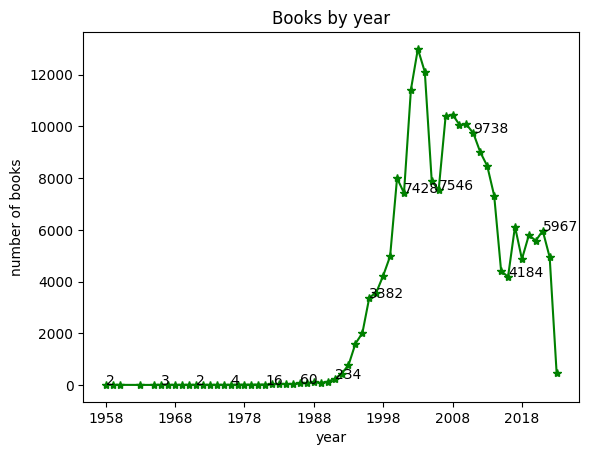

In [38]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1958, 2023, 10))   # 연도별 발행 개수 그래프에 표시
for idx, val in count_by_year[::5].items():     # 슬라이스 연산자 스탭, 다섯 개씩 건너뜀
    plt.annotate(val, (idx, val))   # 그래프에 나타낼 문자열 지정(val), 문자열이 나타날 위치 (x, y)
plt.show()

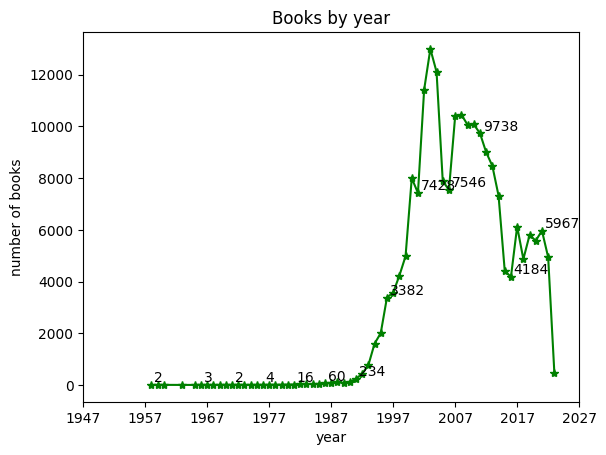

In [40]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947, 2023, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2, 2), textcoords='offset points')    # 픽셀단위 offset pixels
    # xytext로 숫자를 마커에서 조금 떨어뜨림, textcoords는 포인트 단위로 상대적으로 위치를 정해줌
    # (xytext는 x와 y값을 기준으로 이동, y값은 차이가 크기때문에 값을 많이 주어야 함)
plt.show()

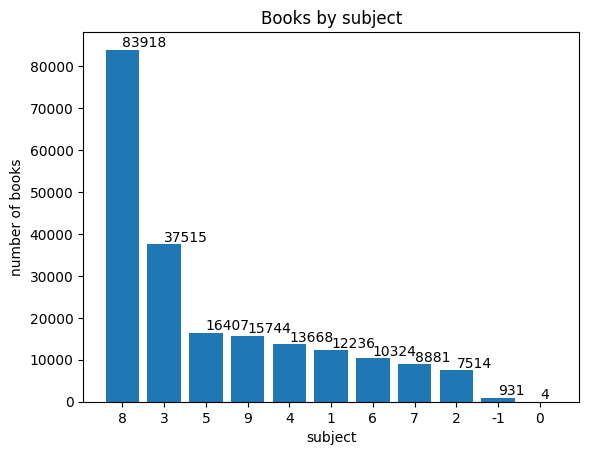

In [41]:
plt.bar(count_by_subject.index, count_by_subject.values)    # (주제 분류 번호, 도서 개수)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

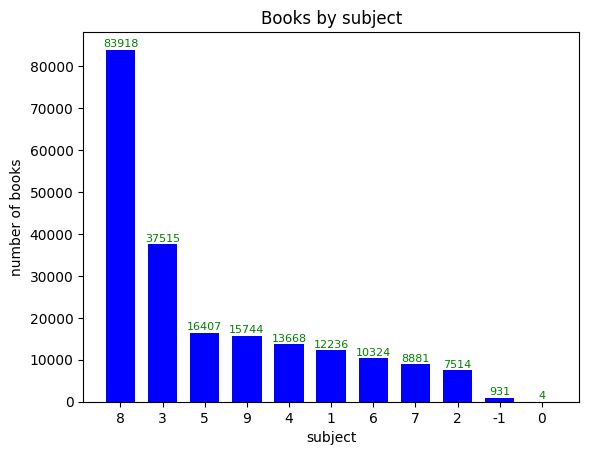

In [43]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')   # 막대 너비, 색상 조절
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points', 
                 fontsize=8, ha='center', color='green')
    # fontsize(글자 크기), ha(텍스트 위치), color(글자 색상)
plt.show()

In [ ]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')     # 가로막대는 barh함수 (width가 아닌 height)
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points', 
                 fontsize=8, va='center', color='green')
plt.show()